**Importar librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import numpy as np
from matplotlib.pyplot import figure

**Leer el archivo csv con las defunciones**

In [2]:
defunciones= pd.read_csv(r'C:\Users\vicen\Desktop\Universidad\Analisis datos 21-1\DEFUNCIONES_FUENTE_DEIS_2016_2021_29042021.csv',delimiter=';')

In [3]:
print(list(defunciones.columns.values))

['ANO_DEF', 'FECHA_DEF', 'GLOSA_SEXO', 'EDAD_TIPO', 'EDAD_CANT', 'CODIGO_COMUNA_RESIDENCIA', 'CODIGO_COMUNA_RESIDENCIA.1', 'GLOSA_REG_RES', 'CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1', 'GLOSA_GRUPO_DIAG1', 'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1', 'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2']


**Explorar un poco la bbdd**

El link de *tidy data* estaba roto. Por lo tanto, asumí que se refería a "ordenar" y "limpiar" los datos.

Revisar la cantidad de datos, el tipo de datos contenidos, la forma en la que están expresados, etc.

De ser necesario, editar los encabezados o tipos de datos

In [4]:
df = defunciones
df.shape

(594391, 17)

In [5]:
df.dtypes

ANO_DEF                        int64
FECHA_DEF                     object
GLOSA_SEXO                    object
EDAD_TIPO                      int64
EDAD_CANT                      int64
CODIGO_COMUNA_RESIDENCIA       int64
CODIGO_COMUNA_RESIDENCIA.1    object
GLOSA_REG_RES                 object
CAPITULO_DIAG1                object
CODIGO_GRUPO_DIAG1            object
GLOSA_GRUPO_DIAG1             object
CODIGO_CATEGORIA_DIAG1        object
GLOSA_CATEGORIA_DIAG1         object
CODIGO_SUBCATEGORIA_DIAG1     object
GLOSA_SUBCATEGORIA_DIAG1      object
CAPITULO_DIAG2                object
GLOSA_CAPITULO_DIAG2          object
dtype: object

In [6]:
df.describe()

,ANO_DEF,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA
count,594391.000000,594391.000000,594391.000000,594391.000000
mean,2018.287038,1.027016,71.987735,9798.845166
std,1.565307,0.256027,18.728873,3964.879864
min,2016.000000,1.000000,1.000000,1101.000000
25%,2017.000000,1.000000,63.000000,6117.000000
50%,2018.000000,1.000000,76.000000,10106.000000
75%,2020.000000,1.000000,85.000000,13121.000000
max,2021.000000,9.000000,999.000000,99999.000000


In [7]:
df.head()

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,CODIGO_COMUNA_RESIDENCIA.1,GLOSA_REG_RES,CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2
0,2021,21-01-2021,Mujer,1,89,10202,Ancud,De Los Lagos,C20X,C00-D48,Tumores [Neoplasias],C15-C26,Tumores malignos de los órganos digestivos,C20,Tumor maligno del recto,C20X,TUMOR MALIGNO DEL RECTO
1,2021,16-03-2021,Mujer,1,89,5801,Quilpué,De Valparaíso,J439,J00-J99,Enfermedades del sistema respiratorio,J40-J47,Enfermedades crónicas de las vías respiratoria...,J43,Enfisema,J439,ENFISEMA NO ESPECIFICADO
2,2021,19-03-2021,Mujer,1,93,5601,San Antonio,De Valparaíso,J449,J00-J99,Enfermedades del sistema respiratorio,J40-J47,Enfermedades crónicas de las vías respiratoria...,J44,Otras enfermedades pulmonares obstructivas cró...,J449,ENFERMEDAD PULMÓNAR OBSTRUCTIVA CRONICA NO ESP...
3,2021,05-01-2021,Mujer,1,94,5109,Viña del Mar,De Valparaíso,C229,C00-D48,Tumores [Neoplasias],C15-C26,Tumores malignos de los órganos digestivos,C22,Tumor maligno del hígado y de las vías biliare...,C229,TUMOR MALIGNO DEL HÍGADO NO ESPECIFICADO
4,2021,19-01-2021,Hombre,1,95,13403,Calera de Tango,Metropolitana de Santiago,C61X,C00-D48,Tumores [Neoplasias],C60-C63,Tumores malignos de los órganos genitales masc...,C61,Tumor maligno de la próstata,C61X,TUMOR MALIGNO DE LA PRÓSTATA


# **Filtrar y limpiar los datos** #

Acá se aprovechan las herramientas de pandas para verificar la integridad de los datos, revisando si hay valores vacíos o duplicados que pueden alterar los resultados obtenidos

In [8]:
df[df.duplicated()].shape

(502, 17)

In [9]:
df = df.drop_duplicates()
df.shape

(593889, 17)

**Valores inexistentes**

In [10]:
n_records = len(df)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(df)

ANO_DEF | 0.0 | int64
FECHA_DEF | 0.0 | object
GLOSA_SEXO | 0.0 | object
EDAD_TIPO | 0.0 | int64
EDAD_CANT | 0.0 | int64
CODIGO_COMUNA_RESIDENCIA | 0.0 | int64
CODIGO_COMUNA_RESIDENCIA.1 | 0.0 | object
GLOSA_REG_RES | 0.0 | object
CAPITULO_DIAG1 | 0.0 | object
CODIGO_GRUPO_DIAG1 | 0.0 | object
GLOSA_GRUPO_DIAG1 | 0.0 | object
CODIGO_CATEGORIA_DIAG1 | 0.0 | object
GLOSA_CATEGORIA_DIAG1 | 0.0 | object
CODIGO_SUBCATEGORIA_DIAG1 | 0.0 | object
GLOSA_SUBCATEGORIA_DIAG1 | 0.0 | object
CAPITULO_DIAG2 | 0.0 | object
GLOSA_CAPITULO_DIAG2 | 0.0 | object


No existen datos vacíos, por lo tanto no será necesario investigar más al respecto

In [11]:
def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(df)

ANO_DEF | 0 | int64
EDAD_TIPO | 7374 | int64
EDAD_CANT | 10008 | int64
CODIGO_COMUNA_RESIDENCIA | 61 | int64


Se observa que 10060 registros de edad que se escapan tres desviaciones estandar del promedio

Se indagará mas respecto a los registros de edad para considerar si es necesario eliminarlos o son significativos para el análisis. <br>
Los "tipos de edad" y el "codigo de comuna de residencia" no nos preocupan ya que son códigos para entregar más info sobre los datos

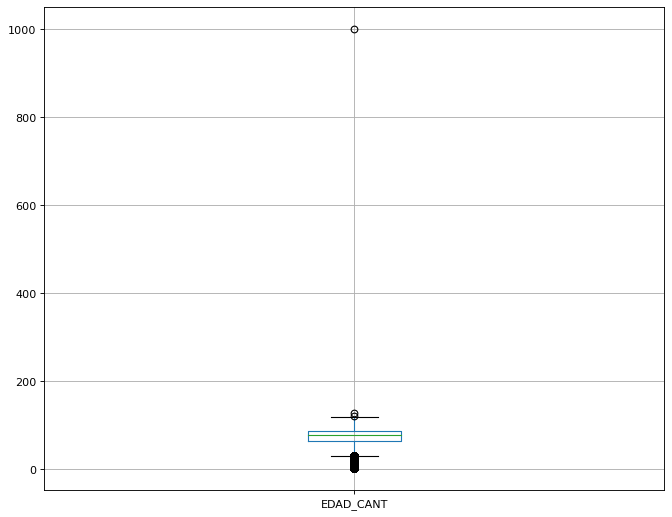

In [29]:
figure(figsize=(10, 8), dpi=80)
df.boxplot(column='EDAD_CANT');

En gráfico boxplot se observa que existen edades exageradamente grandes, sin embargo, para el análisis nos interesa la causa de muerte, por lo tanto, no se eliminarán.


Para trabajar los datos en base al tiempo en el que han sido registrados, se cambiará el tipo de dato de la fecha de defunción al formato fecha

In [28]:
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'], dayfirst = True)

In [14]:
df = df.sort_values(['FECHA_DEF'])

In [15]:
df=df.reset_index()
df=df.drop(['index'], axis=1 )
df

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,CODIGO_COMUNA_RESIDENCIA.1,GLOSA_REG_RES,CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2
0,2016,2016-01-01,Hombre,1,56,16206,Ránquil,De Ñuble,D487,C00-D48,Tumores [Neoplasias],D37-D48,Tumores [neoplasias] de comportamiento inciert...,D48,Tumor de comportamiento incierto o desconocido...,D487,TUMOR DE COMPORTAMIENTO INCIERTO O DESCONOCIDO...
1,2016,2016-01-01,Hombre,1,53,8311,Santa Bárbara,Del Bíobío,R99X,R00-R99,"Síntomas, signos y hallazgos anormales clínico...",R95-R99,Causas de mortalidad mal definidas y desconocidas,R99,Otras causas mal definidas y las no especifica...,R99X,OTRAS CAUSAS MAL DEFINIDAS Y LAS NO ESPECIFICA...
2,2016,2016-01-01,Mujer,1,68,5601,San Antonio,De Valparaíso,I694,I00-I99,Enfermedades del sistema circulatorio,I60-I69,Enfermedades cerebrovasculares,I69,Secuelas de enfermedad cerebrovascular,I694,SECUELAS DE ENFERMEDAD CEREBROVASCULAR NO ESPE...
3,2016,2016-01-01,Mujer,1,64,2101,Antofagasta,De Antofagasta,I249,I00-I99,Enfermedades del sistema circulatorio,I20-I25,Enfermedades isquémicas del corazón,I24,Otras enfermedades isquémicas agudas del corazón,I249,ENFERMEDAD ISQUEMICA AGUDA DEL CORAZÓN NO ESPE...
4,2016,2016-01-01,Hombre,1,72,1107,Alto Hospicio,De Tarapacá,C679,C00-D48,Tumores [Neoplasias],C64-C68,Tumores malignos de las vías urinarias,C67,Tumor maligno de la vejiga urinaria,C679,TUMOR MALIGNO DE LA VEJIGA URINARIA PARTE NO E...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593884,2021,2021-04-21,Mujer,1,79,13128,Renca,Metropolitana de Santiago,I219,I00-I99,Enfermedades del sistema circulatorio,I20-I25,Enfermedades isquémicas del corazón,I21,Infarto agudo del miocardio,I219,INFARTO AGUDO DEL MIOCARDIO SIN OTRA ESPECIFIC...
593885,2021,2021-04-21,Mujer,1,99,5501,Quillota,De Valparaíso,I64X,I00-I99,Enfermedades del sistema circulatorio,I60-I69,Enfermedades cerebrovasculares,I64,"Accidente vascular encefálico agudo, no especi...",I64X,ACCIDENTE VASCULAR ENCEFALICO AGUDO NO ESPECIF...
593886,2021,2021-04-21,Mujer,1,55,4102,Coquimbo,De Coquimbo,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado
593887,2021,2021-04-21,Hombre,1,75,6117,San Vicente,Del Libertador B. O'Higgins,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado


In [16]:
grouper = pd.Grouper(key='FECHA_DEF', freq='W')
df["Semana"] = df.groupby(grouper).grouper.group_info[0] + 1

In [17]:
df

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,CODIGO_COMUNA_RESIDENCIA.1,GLOSA_REG_RES,CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,Semana
0,2016,2016-01-01,Hombre,1,56,16206,Ránquil,De Ñuble,D487,C00-D48,Tumores [Neoplasias],D37-D48,Tumores [neoplasias] de comportamiento inciert...,D48,Tumor de comportamiento incierto o desconocido...,D487,TUMOR DE COMPORTAMIENTO INCIERTO O DESCONOCIDO...,1
1,2016,2016-01-01,Hombre,1,53,8311,Santa Bárbara,Del Bíobío,R99X,R00-R99,"Síntomas, signos y hallazgos anormales clínico...",R95-R99,Causas de mortalidad mal definidas y desconocidas,R99,Otras causas mal definidas y las no especifica...,R99X,OTRAS CAUSAS MAL DEFINIDAS Y LAS NO ESPECIFICA...,1
2,2016,2016-01-01,Mujer,1,68,5601,San Antonio,De Valparaíso,I694,I00-I99,Enfermedades del sistema circulatorio,I60-I69,Enfermedades cerebrovasculares,I69,Secuelas de enfermedad cerebrovascular,I694,SECUELAS DE ENFERMEDAD CEREBROVASCULAR NO ESPE...,1
3,2016,2016-01-01,Mujer,1,64,2101,Antofagasta,De Antofagasta,I249,I00-I99,Enfermedades del sistema circulatorio,I20-I25,Enfermedades isquémicas del corazón,I24,Otras enfermedades isquémicas agudas del corazón,I249,ENFERMEDAD ISQUEMICA AGUDA DEL CORAZÓN NO ESPE...,1
4,2016,2016-01-01,Hombre,1,72,1107,Alto Hospicio,De Tarapacá,C679,C00-D48,Tumores [Neoplasias],C64-C68,Tumores malignos de las vías urinarias,C67,Tumor maligno de la vejiga urinaria,C679,TUMOR MALIGNO DE LA VEJIGA URINARIA PARTE NO E...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593884,2021,2021-04-21,Mujer,1,79,13128,Renca,Metropolitana de Santiago,I219,I00-I99,Enfermedades del sistema circulatorio,I20-I25,Enfermedades isquémicas del corazón,I21,Infarto agudo del miocardio,I219,INFARTO AGUDO DEL MIOCARDIO SIN OTRA ESPECIFIC...,278
593885,2021,2021-04-21,Mujer,1,99,5501,Quillota,De Valparaíso,I64X,I00-I99,Enfermedades del sistema circulatorio,I60-I69,Enfermedades cerebrovasculares,I64,"Accidente vascular encefálico agudo, no especi...",I64X,ACCIDENTE VASCULAR ENCEFALICO AGUDO NO ESPECIF...,278
593886,2021,2021-04-21,Mujer,1,55,4102,Coquimbo,De Coquimbo,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,278
593887,2021,2021-04-21,Hombre,1,75,6117,San Vicente,Del Libertador B. O'Higgins,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,278


In [18]:
df_semana = df.groupby('Semana').size().reset_index(name='Muertes')

In [19]:
df_semana

,Semana,Muertes
0,1,874
1,2,1883
2,3,1884
3,4,1917
4,5,1837
...,...,...
273,274,2728
274,275,2798
275,276,2816
276,277,2741


In [20]:
df_gripe = df[(df.GLOSA_CATEGORIA_DIAG1 == "Influenza [gripe] y neumonía")]

In [21]:
df_gripe_semana = df_gripe.groupby(['GLOSA_CATEGORIA_DIAG1','Semana']).size().reset_index(name='Muertes')
df_gripe_semana

,GLOSA_CATEGORIA_DIAG1,Semana,Muertes
0,Influenza [gripe] y neumonía,1,17
1,Influenza [gripe] y neumonía,2,63
2,Influenza [gripe] y neumonía,3,47
3,Influenza [gripe] y neumonía,4,49
4,Influenza [gripe] y neumonía,5,47
...,...,...,...
273,Influenza [gripe] y neumonía,274,46
274,Influenza [gripe] y neumonía,275,51
275,Influenza [gripe] y neumonía,276,40
276,Influenza [gripe] y neumonía,277,37


In [22]:
df_covid = df.drop(df[df.CODIGO_CATEGORIA_DIAG1 != "U00-U49"].index)

In [23]:
df_covid

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,CODIGO_COMUNA_RESIDENCIA.1,GLOSA_REG_RES,CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,Semana
448668,2020,2020-03-16,Hombre,1,73,13130,San Miguel,Metropolitana de Santiago,U072,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U072,COVID-19 virus no identificado,221
449045,2020,2020-03-18,Mujer,1,62,5501,Quillota,De Valparaíso,U072,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U072,COVID-19 virus no identificado,221
449411,2020,2020-03-19,Mujer,1,64,13103,Cerro Navia,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,221
449675,2020,2020-03-20,Hombre,1,64,13102,Cerrillos,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,221
449838,2020,2020-03-20,Hombre,1,90,13124,Pudahuel,Metropolitana de Santiago,U072,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U072,COVID-19 virus no identificado,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593879,2021,2021-04-21,Mujer,1,40,9203,Curacautín,De La Araucanía,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,278
593882,2021,2021-04-21,Hombre,1,41,9103,Cunco,De La Araucanía,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,278
593886,2021,2021-04-21,Mujer,1,55,4102,Coquimbo,De Coquimbo,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,278
593887,2021,2021-04-21,Hombre,1,75,6117,San Vicente,Del Libertador B. O'Higgins,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,278


In [24]:
df_covid_semana = df_covid.groupby(['Semana']).size().reset_index(name='Muertes')
df_covid_semana.head()

,Semana,Muertes
0,221,8
1,222,19
2,223,64
3,224,89
4,225,98


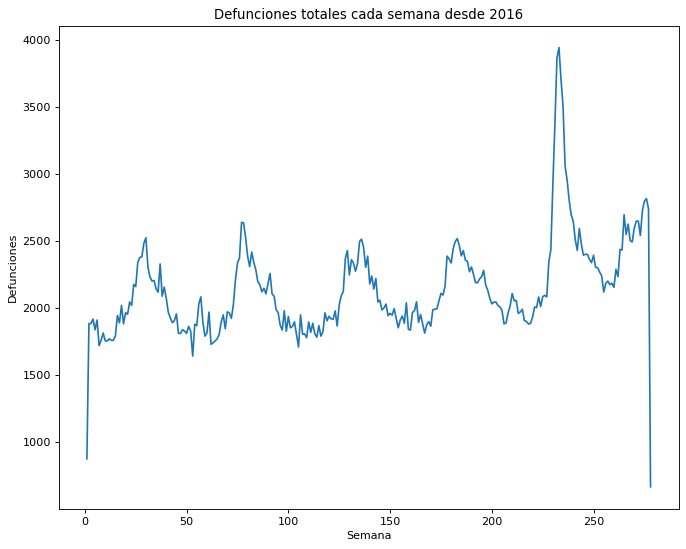

In [25]:
figure(figsize=(10, 8), dpi=80)
plt.plot(df_semana['Semana'],df_semana['Muertes'])
plt.xlabel('Semana')
plt.ylabel('Defunciones')
plt.title('Defunciones totales cada semana desde 2016')
plt.show()

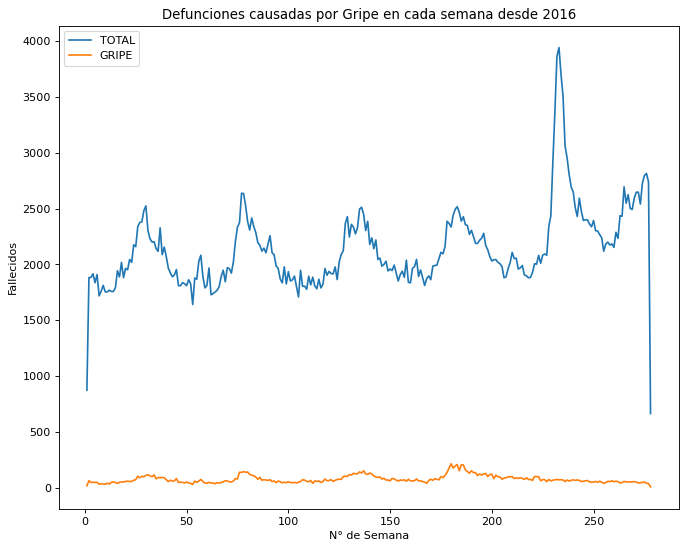

In [26]:
figure(figsize=(10, 8), dpi=80)
plt.plot(df_semana['Semana'],df_semana['Muertes'], label='TOTAL')
plt.plot(df_gripe_semana['Semana'],df_gripe_semana['Muertes'],label='GRIPE')
plt.legend(loc="upper left") 
plt.xlabel('N° de Semana')
plt.ylabel('Fallecidos')
plt.title('Defunciones causadas por Gripe en cada semana desde 2016')
plt.show()

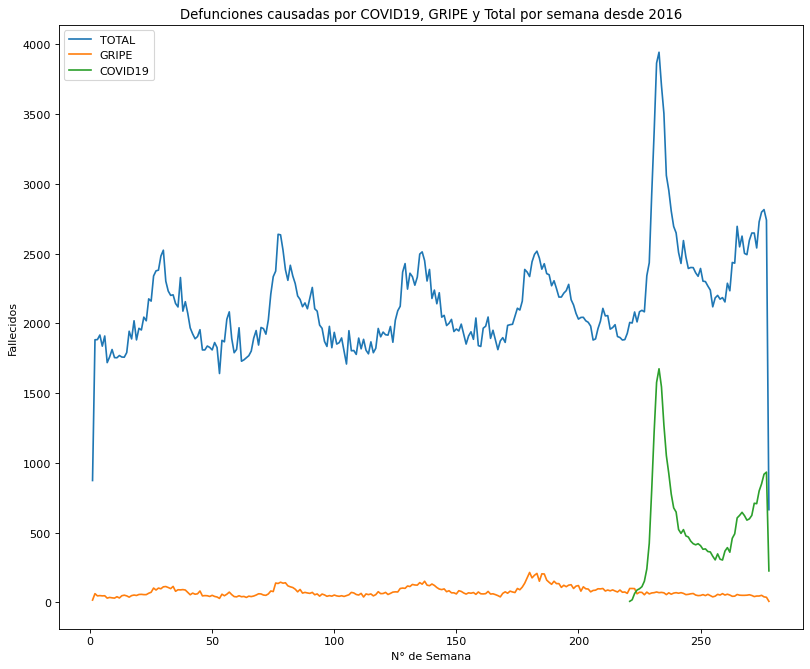

In [27]:
figure(figsize=(12, 10), dpi=80)
plt.plot(df_semana['Semana'],df_semana['Muertes'], label='TOTAL')
plt.plot(df_gripe_semana['Semana'],df_gripe_semana['Muertes'],label='GRIPE')
plt.plot(df_covid_semana['Semana'],df_covid_semana['Muertes'],label='COVID19')
plt.legend(loc="upper left") 
plt.xlabel('N° de Semana')
plt.ylabel('Fallecidos')
plt.title('Defunciones causadas por COVID19, GRIPE y Total por semana desde 2016')
plt.show()

# Es el COVID como la gripe común, o no?  
<br> </br>
Se puede observar en el gráfico "Fallecidos por COVID19, GRIPE y Total por semana" que el covid rápidamente sobrepasó como causa de muerte a la gripe, y la curva de muertes es parecida a la tendencia de la curva de contagios en Chile. En cambio, la gripe presenta un comportamiento estable y lineal en el tiempo. Por lo tanto, con la información contenida en los gráficos, el COVID **no** es como la gripe común.